<a href="https://colab.research.google.com/github/rahmaazamihassani/Sentiment-Analysis/blob/master/ArchivesBerberes_FinalVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U textblob
!pip install -U textblob-fr

In [ ]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
import random
from textblob import Word
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

In [ ]:
stop_words = stopwords.words('french')
stop_words.extend(["cette","tous","surtout","encore","aussi","deux","environ","depuis","puis","entre","ainsi","non","oui","toute","ceux","avoir","ben","certain","peu","cet","plusieurs","enfin","laquelles","ni","ici","chaque","beaucoup","pendant","alors","déjà","tout","chez","devant","autre","celle","avant","aucun","où","quelque","trois","très","toujours","après","plus","chez","si","comme","bien","leurs","si","fait","leurs","contre","celui","dernier","dont","autres","el","faire","toutes","dit","cela","quand","parce","laquelle","chose","premier","rien","quelques","car"])
len(stop_words)

In [ ]:
#import wordcloud used for creating beautiful visuals
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer

In [ ]:
import pandas as pd
from lxml import objectify
import requests
import re

def xml_to_dfb(root):
    document_ids = [document['id'].text for document in root.getchildren()]
    document_vols = [document['vol'].text for document in root.getchildren()]
    document_bodies = [document['body'].text for document in root.getchildren()]

    data = {'id': document_ids, 'vol': document_vols, 'body': document_bodies}
    return pd.DataFrame(data)

In [ ]:
URL_TO_XMLb = 'https://raw.githubusercontent.com/ayoubkachkach/archive_berbere/master/archives_berberes_v2.xml'
# I hosted the XML online.
xmlb = requests.get(URL_TO_XMLb).content.decode('utf-8')
root = objectify.fromstring(xmlb)
dfb = xml_to_dfb(root)
dfb = dfb.sort_values(by= 'vol', ascending=True)
years = ['1915','1915','1916','1916','1917','1917','1917','1917','1918', '1918']
dfb['year'] = years
dfb

In [ ]:
totalsentiment = 0.0
counter = 0.0
sentiment_list = []
for index, row in dfb.iterrows():
  body = row['body'] #put text of cell in variable body
  all_list = [] #initialise sentence list
  for v in sent_tokenize(body, language = 'french'): #sentence tokenize body into a list of sentences.
      all_list.append(v) #append each sentence to list all_list
  for sentence in all_list:
    blob = TextBlob(sentence, pos_tagger = PatternTagger(), analyzer=PatternAnalyzer())
    totalsentiment = totalsentiment + float(str(blob.sentiment[0])) #add sentiments 
    counter = counter + 1
  
  avg_sent_sent = totalsentiment/counter
  sentiment_list.append(avg_sent_sent)

print(sentiment_list)
len(sentiment_list)  

In [ ]:
df_all = dfb
df_all['overall sentiment'] = sentiment_list
df_all

In [ ]:
df_juif = dfb[dfb['body'].str.contains("juif")]
df_juif = df_juif.sort_values(by= 'year', ascending=True)
df_juif
#transform this to add all kinds of related words to juif e.g. "Uhoud","Juifs","juifs","JUIF","JUIVE","JUIFS","UHOUD"

In [ ]:
totalsentiment_juif = 0.0
counter_juif = 0.0
sentiment_list_juif = []
for index, row in df_juif.iterrows():
  body = row['body'] #put text of cell in variable body
  sentence_list_juif = [] #initialise sentence list
  for v in sent_tokenize(body, language = 'french'): #sentence tokenize body into a list of sentences.
      sentence_list_juif.append(v) #append each sentence to list sentence_list
  keywords = ["juif","JUIF", "Juif"]
  juif_list = [] #initialize juif_list list of sentences containing juif
  for sentence in sentence_list_juif:
    flag = 0 
    for keyword in keywords:
      if keyword in sentence:
        blob = TextBlob(sentence, pos_tagger = PatternTagger(), analyzer=PatternAnalyzer())
        totalsentiment_juif = totalsentiment_juif + float(str(blob.sentiment[0])) #add sentiments 
        counter_juif = counter_juif + 1
        juif_list.append(sentence)
      flag = 1
    if flag == 0:
      negative_list.append(sentence)
  avg_sent_juif = totalsentiment_juif/counter_juif
  sentiment_list_juif.append(avg_sent_juif)

print(sentiment_list_juif)
len(sentiment_list_juif)  

[0.32, 0.09458333333333335, 0.0611904761904762, 0.027982440476190473, 0.025013520408163264, 0.028577783140283135, 0.028702929197994987, 0.030398522927689593, 0.04053595521541949]


9

In [ ]:
df_juif['sentiment towards Jews'] = sentiment_list_juif
df_juif

,id,vol,body,year,overall sentiment,sentiment towards Jews
8,8,1.1,[p.1]\nVOLUME I FASCICULE 1\n\nArchives Berbè...,1915,0.049004,0.320000
0,0,1.2,[p.1]\nE——\n\nVOLUME FASCICULE 2\n\nArchives B...,1915,0.039963,0.094583
3,3,1.3,[p.1]\nVOLUME 1 FASCICULE 3\n\nLES ARCHIVES BE...,1916,0.036192,0.061190
4,4,1.4,[p.1]\nVOLUME 1 419 FASCICULE 4\n\nLES ARCHIVE...,1916,0.038814,0.027982
9,9,2.1,[p.1]\nLES ARCHIVES BERBERES Publication du Co...,1917,0.042535,0.025014
5,5,2.3,[p.1]\nLES ARCHIVES BERBÈRES Publication du Co...,1917,0.045979,0.028578
7,7,2.4,[p.1]\nLES ARCHIVES BERBERES Publication du Co...,1917,0.043332,0.028703
6,6,3.1,[p.1]\nLES ARCHIVES BERBERES Publication du Co...,1918,0.043282,0.030399
1,1,3.2,[p.1]\nLES ARCHIVES BERBÈRES Publication du Co...,1918,0.042795,0.040536


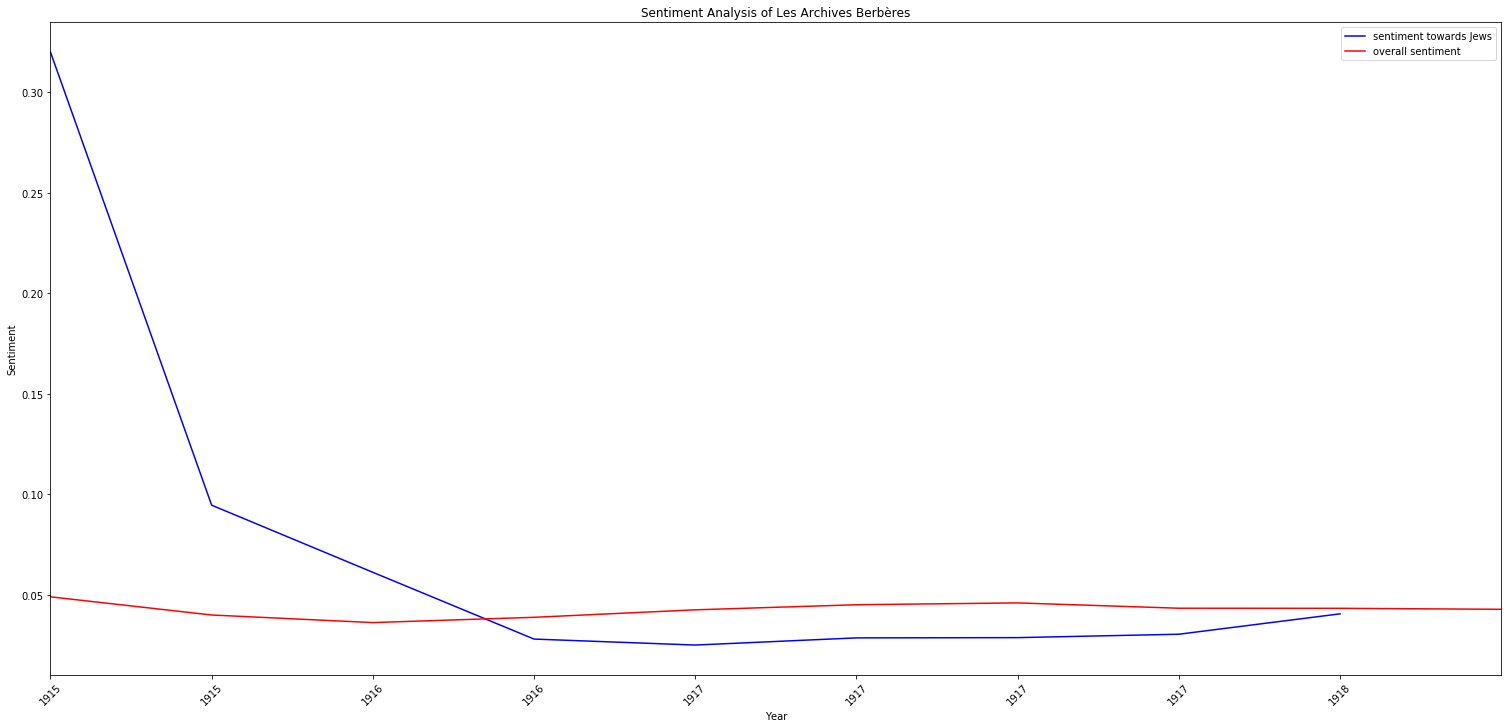

In [ ]:
ax = plt.gca()
df_juif.plot(kind='line',x='year',y='sentiment towards Jews', figsize=(26, 12),color= 'blue',ax=ax)
df_all.plot(kind='line',x='year',y='overall sentiment', figsize=(26, 12),color= 'red',ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Sentiment")
plt.title("Sentiment Analysis of Les Archives Berbères")
#plt.xticks(np.arange(1913, 1920, 1))
ax.tick_params(axis ='x', rotation = 45)
plt.show()

In [ ]:
juif_tok = []

for sentence in juif_list:
  word_tokens = word_tokenize(sentence)
  word_tokens = [w.lower() for w in word_tokens if w.isalpha()]
  #sentence = [w for w in word_tokens if not w in stop_words] 
  sentence = [] 
  for w in word_tokens: 
    if w not in stop_words: 
      #sentence.append(w)
      juif_tok.append(w)
  #print(sentence)
  #juif_tok.append(sentence)


juif_detok = TreebankWordDetokenizer().detokenize(juif_tok)

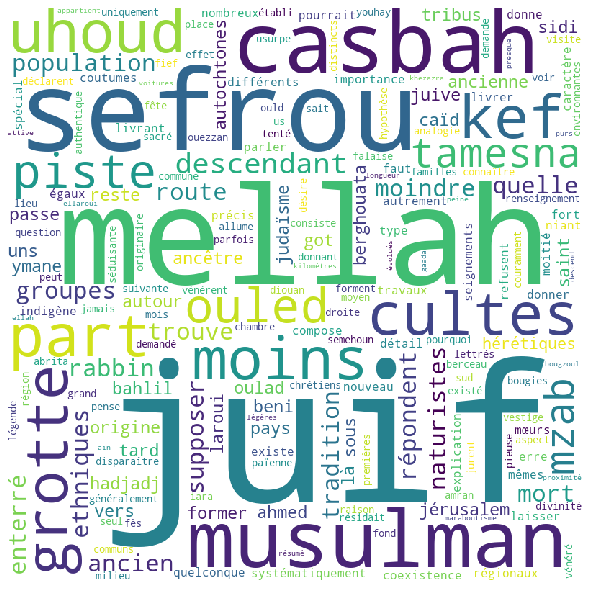

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(juif_detok) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
nltk.download('averaged_perceptron_tagger')

blob = TextBlob('Analytics Vidhya is a thriving community for data driven industry. This platform allows \
people to know more about analytics from its articles, Q&A forum, and learning paths. Also, we help \
professionals & amateurs to sharpen their skillsets by providing a platform to participate in Hackathons.')
nouns = list()
for word, tag in blob.tags:
  if tag == 'NN':
    nouns.append(word.lemmatize())

print ("This text is about...")
for item in random.sample(nouns, 5):
  word = Word(item)
  print (word.pluralize())

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
This text is about...
platforms
platforms
forums
industries
communities
